In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.1 MB/s eta 0:00:00


In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [3]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [4]:
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [55]:
max_length = 10
num_beams = 4
temperature = 2

gen_kwargs = {"max_length": max_length, "num_beams": num_beams, "temperature": temperature}

In [56]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      _i_image = i_image.convert(mode = "RGB")
    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors='pt').pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]

  return preds

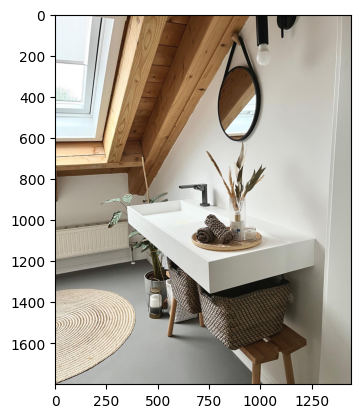

In [57]:
import cv2
import matplotlib.pyplot as plt
path = "/content/imagenprueba0.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [58]:
predict_step(['imagenprueba0.jpg'])

['a sink and a mirror in a bathroom']

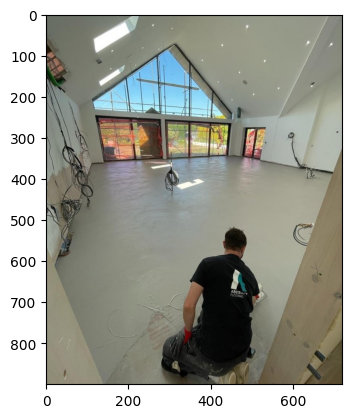

In [59]:
path = "/content/imagenprueba1.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [60]:
predict_step(['imagenprueba1.jpg'])

['a man sitting on the floor in a room']

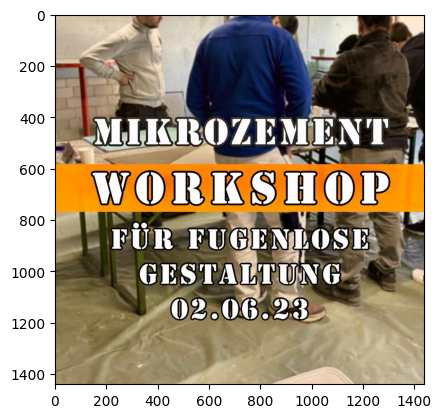

In [61]:
path = "/content/imagenprueba2.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [62]:
predict_step(['imagenprueba2.jpg'])

['a crowd of people standing around a table with']

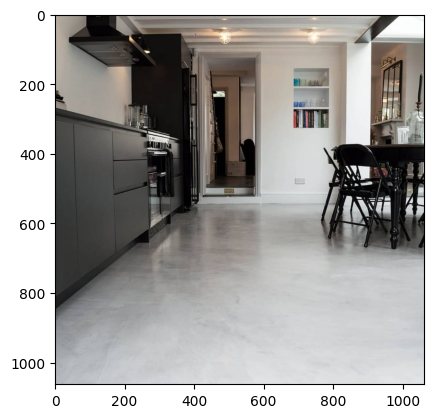

In [63]:
path = "/content/imagenprueba3.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [64]:
predict_step(['imagenprueba3.jpg'])

['a kitchen with a stove and a refrigerator']

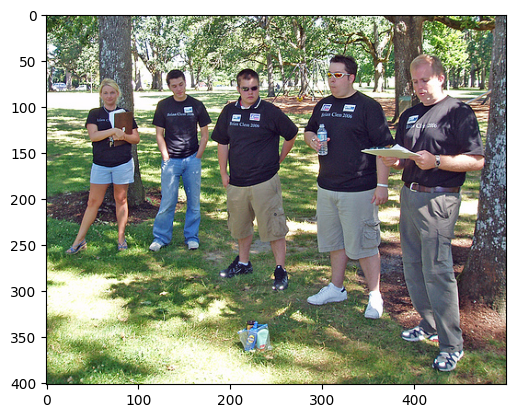

In [65]:
path = "/content/imagenprueba4.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [66]:
predict_step(['imagenprueba4.jpg'])

['people standing in a park with a fris']

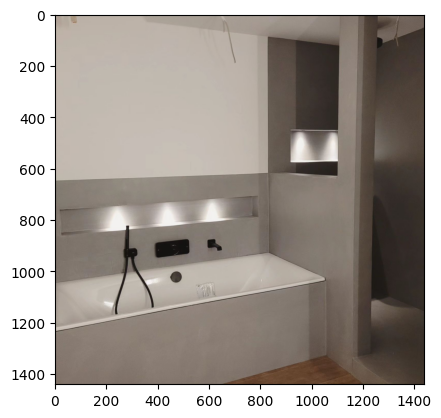

In [67]:
path = "/content/imagenprueba5.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [68]:
predict_step(['imagenprueba5.jpg'])

['a white sink sitting under a mirror in a']

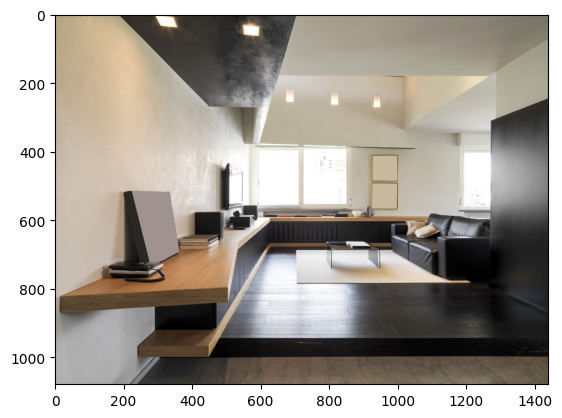

In [84]:
path = "/content/imagenprueba6.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [83]:
predict_step(['/content/imagenprueba6.jpg'])

['a bathroom with a sink, mirror, and']

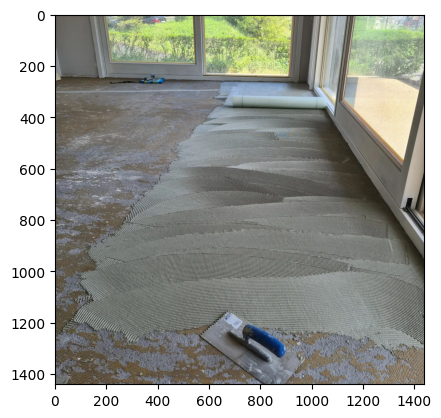

In [73]:
path = "/content/imagenprueba7.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [76]:
predict_step(['/content/imagenprueba7.jpg'])

['the floor of a room with a rug and']

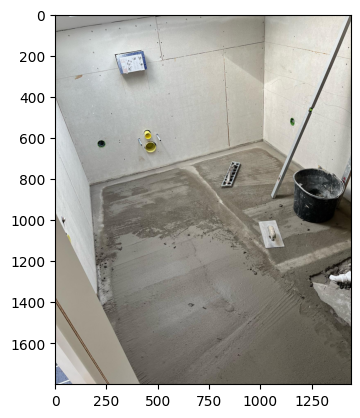

In [77]:
path = "/content/imagenprueba8.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [78]:
predict_step(['/content/imagenprueba8.jpg'])

['a bathroom with a sink, toilet, and']

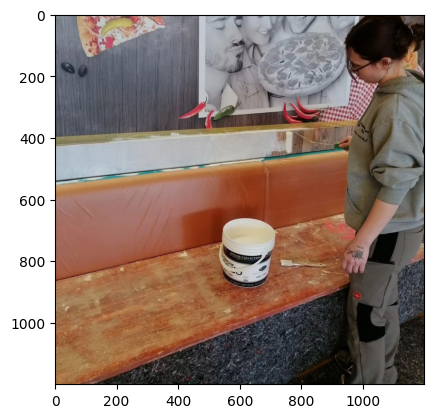

In [82]:
path = "/content/imagenprueba9.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [81]:
predict_step(['/content/imagenprueba9.jpg'])

['a man standing in front of a toilet bowl']